In [1]:
%matplotlib inline

# Examples of differences between composite Shapley and one-vs-rest Shapley

Composite Shapley

- Unique ordering of feature importance based on the norm of the vectors in the ILR space
- The feature contribution path contains all the information.

Shapley

- One ordering of feature importance per one-vs-rest class Shapley
- Instances with different feature importance paths in the ILR space may show the same Shapley values in the one-vs-rest form

In [2]:
import matplotlib.pyplot as plt
import numpy as np

cm = plt.cm.tab10
colors = cm.colors
cm

plt.rcParams['axes.grid'] = True

# Definition of a coordinate system in ILR space

Isometric Log-ratio space

In [3]:
def rotate(vector, angle):
    radians = np.radians(angle)
    return np.inner(np.array([[np.cos(radians), -np.sin(radians)],
                              [np.sin(radians), np.cos(radians)]]),
                    np.array(vector).T)

def plot_coordinate_system(ax):

    #class_coordinates = np.array([
    #    rotate(np.array([1, 0]), 30),
    #    rotate(np.array([1, 0]), 30+120),
    #    rotate(np.array([1, 0]), 30+240)])

    class_coordinates = np.array([
        rotate(np.array([1, 0]), 30),
        rotate(np.array([1, 0]), 30+120),
        rotate(np.array([1, 0]), 30+240)])
    

    for i, coord in enumerate(class_coordinates):
        ax.arrow(0, 0, coord[0], coord[1], shape='full', head_width=0.1, color=colors[i])
        ax.text(coord[0]/2, coord[1]/2, f"$C_{i}$")
    
    decision_boundaries = np.array([rotate(np.array([0, 3]), 0),
                           rotate(np.array([0, 3]), 120),
                           rotate(np.array([0, 3]), 240)])
    
    for i, coord in enumerate(decision_boundaries):
        ax.arrow(0, 0, coord[0], coord[1], linestyle='--')
    
    ax.set_box_aspect(1)

Example of the coordinate system

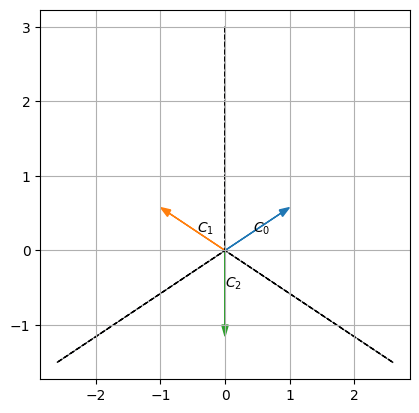

In [4]:
fig = plt.figure()
ax = plt.subplot()
plot_coordinate_system(ax=ax)

## Definition of instances and feature contributions

In order to simplify the code, each instance is defined by the end points of the contribution of each feature. This does not correspond to the Shapley values. To obtain the Shapley values we need to subtract the begining of the line of each feature contribution.

In [5]:
base = rotate([0.1, 0], 30)
base = np.array([0 ,.0])
                
instance_list = [[rotate([0.5, 0.2], 30),
                  rotate([1, 1], 30),
                  rotate([2, 0], 30)],
                 [rotate([0.5, -0.2], 30),
                  rotate([1, -1], 30),
                  rotate([2, 0], 30)],
                [rotate([2, 0], 30),
                  rotate([2, -0.5], 30),
                  rotate([2, 0], 30)]]

instance_list = [[np.array([0.2, -0.5]),
                  np.array([1, -1]),
                  np.array([0, -2])],
                 [np.array([-0.2, -0.5]),
                  np.array([-1, -1]),
                  np.array([0, -2])],
                [np.array([0, -2]),
                  np.array([10, -2]),
                  np.array([0, -2])]]

print(instance_list)

instance_shapley_list = []
for i, instance in enumerate(instance_list):
    instance_shapley_list.append([])
    last = base.copy()
    print(f"Instance {i}")
    for j in range(len(instance)):
        instance_shapley_list[i].append(instance[j] - last)
        last = instance[j]
        print(f"\tShapley contribution of feature {j} = {last}")

[[array([ 0.2, -0.5]), array([ 1, -1]), array([ 0, -2])], [array([-0.2, -0.5]), array([-1, -1]), array([ 0, -2])], [array([ 0, -2]), array([10, -2]), array([ 0, -2])]]
Instance 0
	Shapley contribution of feature 0 = [ 0.2 -0.5]
	Shapley contribution of feature 1 = [ 1 -1]
	Shapley contribution of feature 2 = [ 0 -2]
Instance 1
	Shapley contribution of feature 0 = [-0.2 -0.5]
	Shapley contribution of feature 1 = [-1 -1]
	Shapley contribution of feature 2 = [ 0 -2]
Instance 2
	Shapley contribution of feature 0 = [ 0 -2]
	Shapley contribution of feature 1 = [10 -2]
	Shapley contribution of feature 2 = [ 0 -2]


## Plot feature contributions of each instance

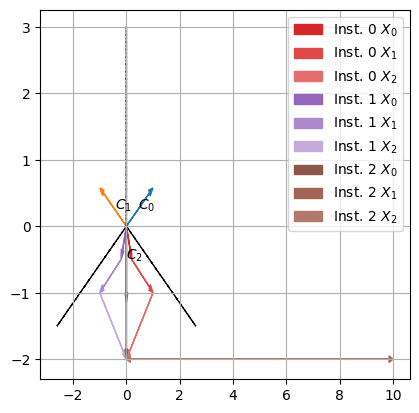

In [6]:
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

def plot_instances(base, instance_list, ax):
    instance_colors = colors[3:]
    
    for i, instance in enumerate(instance_list):
        last = base.copy()
        color = instance_colors[i]
        for j in range(len(instance)):
            d_next = instance[j] - last
            ax.arrow(x=last[0], y=last[1], dx=d_next[0], dy=d_next[1],
                     shape='full', head_width=0.1, length_includes_head=True,
                     color=adjust_lightness(color, amount=1+0.5*(j/len(instance))),
                     label=f"Inst. {i} $X_{j}$")
            last += d_next

fig = plt.figure()
ax = plt.subplot()
plot_coordinate_system(ax=ax)
plot_instances(base, instance_list, ax=ax)
plt.legend()

## Feature contributions in ILR and probability space

In [7]:
from composition_stats import ilr, sbp_basis
from shapleycomposition import ilr_inv

sbpmatrix=np.array([[1,-1,0],
                    [1,1,-1]])
basis = sbp_basis(sbpmatrix)

base_prob = ilr_inv(base, basis=basis)
print(f"Base in ILR space = {base}")
print(f"Base probabilities = {base_prob}")
print()

for i, instance in enumerate(instance_list):
    print(f"Instance {i}")
    for j, feature in enumerate(instance):
        print(f"\tFeature {j} in ILR space = {feature}")
        ilr_feat = ilr_inv(feature, basis=basis)
        print(f"\t\tin probability space = {ilr_feat}")
    print()

Base in ILR space = [0. 0.]
Base probabilities = [0.33333333 0.33333333 0.33333333]

Instance 0
	Feature 0 in ILR space = [ 0.2 -0.5]
		in probability space = [0.29804883 0.22462102 0.47733016]
	Feature 1 in ILR space = [ 1 -1]
		in probability space = [0.34232785 0.08322563 0.57444652]
	Feature 2 in ILR space = [ 0 -2]
		in probability space = [0.0736245 0.0736245 0.852751 ]

Instance 1
	Feature 0 in ILR space = [-0.2 -0.5]
		in probability space = [0.22462102 0.29804883 0.47733016]
	Feature 1 in ILR space = [-1 -1]
		in probability space = [0.08322563 0.34232785 0.57444652]
	Feature 2 in ILR space = [ 0 -2]
		in probability space = [0.0736245 0.0736245 0.852751 ]

Instance 2
	Feature 0 in ILR space = [ 0 -2]
		in probability space = [0.0736245 0.0736245 0.852751 ]
	Feature 1 in ILR space = [10 -2]
		in probability space = [9.90257862e-01 7.14326621e-07 9.74142398e-03]
	Feature 2 in ILR space = [ 0 -2]
		in probability space = [0.0736245 0.0736245 0.852751 ]



Instance 0
	Feature 0 Shapley probability contribution = [0.29804883 0.22462102 0.47733016]
	Feature 1 Shapley probability contribution = [0.48023922 0.20556375 0.31419703]
	Feature 2 Shapley probability contribution = [0.04916876 0.62693502 0.32389621]
Instance 1
	Feature 0 Shapley probability contribution = [0.22462102 0.29804883 0.47733016]
	Feature 1 Shapley probability contribution = [0.20556375 0.48023922 0.31419703]
	Feature 2 Shapley probability contribution = [0.62693502 0.04916876 0.32389621]
Instance 2
	Feature 0 Shapley probability contribution = [0.0736245 0.0736245 0.852751 ]
	Feature 1 Shapley probability contribution = [9.99925955e-01 7.21300740e-07 7.33233386e-05]
	Feature 2 Shapley probability contribution = [5.20351438e-13 9.99999279e-01 7.21353632e-07]


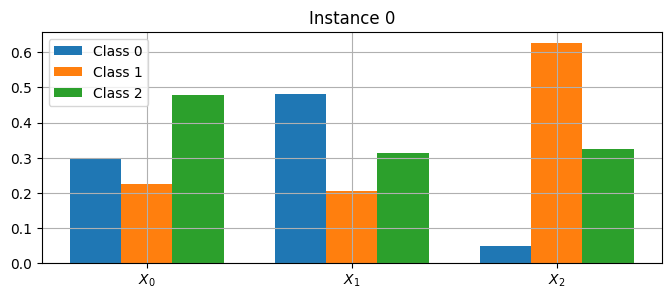

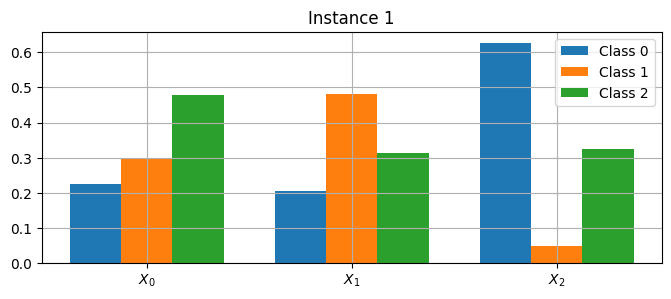

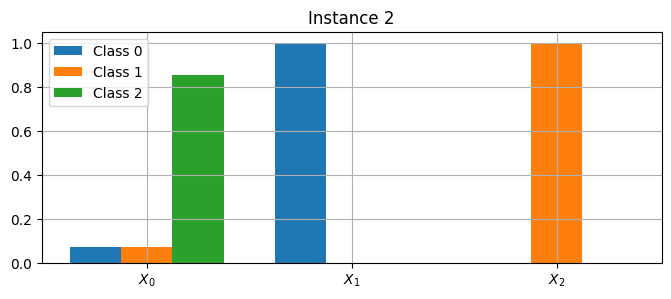

In [8]:
instance_shapley_prob_list = [[ilr_inv(shapley, basis) for shapley in shapley_list]
                              for shapley_list in instance_shapley_list]

instance_shapley_prob_list = []
for i, shapley_list in enumerate(instance_shapley_list):
    instance_shapley_prob_list.append([])
    instance_shapley_prob_list[i].append(ilr_inv(shapley_list[0] - base, basis))
    for j in range(1, len(shapley_list)):
        #instance_shapley_prob_list[i].append(ilr_inv(shapley_list[j], basis)- ilr_inv(shapley_list[j-1], basis))
        instance_shapley_prob_list[i].append(ilr_inv(shapley_list[j] - shapley_list[j-1], basis))

for i, shapley_prob_list in enumerate(instance_shapley_prob_list):
    print(f"Instance {i}")
    for j, shapley_prob in enumerate(shapley_prob_list):
        print(f"\tFeature {j} Shapley probability contribution = {shapley_prob}")

def plot_shapley_instances_bars(instance_shapley_prob_list):
    for i, shapley_prob_list in enumerate(instance_shapley_prob_list):
        fig = plt.figure(figsize=(8, 3))
        ax = fig.add_subplot()
        ax.set_title(f"Instance {i}")
        n_features = len(shapley_prob_list)
        x = np.arange(n_features)
        n_classes = len(shapley_prob_list[0])
        width = 1/(n_classes+1)
        shapley_prob_list_t = np.array(shapley_prob_list).T
        for j, shapley_prob in enumerate(shapley_prob_list_t):
            offset = width * j
            ax.bar(x + offset, shapley_prob, width, label=f"Class {j}")
        ax.set_xticks(x + width, [f"$X_{j}$" for j in range(n_features) ])
        ax.legend()

plot_shapley_instances_bars(instance_shapley_prob_list)

## One-vs-rest SHAP contributions

**TODO:** Need to add the feature contributions projected into each class

In [9]:
#train an SVM classifier
svc_linear = svm.SVC(kernel='rbf', probability=True)
svc_linear.fit(X_train, Y_train)

def predict_onevsrest(predict_proba,class_to_evaluate):
    #Transform a predict_proba function into a one-vs-rest predict_proba
    def ovr(X):
        pred= predict_proba(X)
        return np.array([pred[:,class_to_evaluate], 1-pred[:,class_to_evaluate]]).transpose()
    return ovr

# 3 independent explaination of the predictions in a one-vs-rest setting for class i
Shapley_dict = {}
Base_dict    = {}
for i in range(3):
    predict_proba = predict_onevsrest(svc_linear.predict_proba, i)
    explainer = ShapleyExplainer(predict_proba, X_train, 2,
                            names_classes=[data.target_names[i],'rest'],
                            names_features=data.feature_names)
    (shapley, base) = explainer.explain_instance(np.array(X_test[K]))
    Shapley_dict[data.target_names[i]] = shapley
    Base_dict[data.target_names[i]] = base

for key in Base_dict.keys():
    print(key)
    print(f"Base = {Base_dict[key]}")
    print(f"Shapley = {Shapley_dict[key].squeeze().transpose()}")

Base    = np.array(list(Base_dict.values()))
Shapley = np.array(list(Shapley_dict.values())).squeeze().transpose()

NameError: name 'svm' is not defined